# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [作業目標]
- 依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

# [作業重點]
- 從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])
- 繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jupyterthemes.jtplot as jtplot
jtplot.style('monokai')
%matplotlib inline

# 設定 data_path
dir_data = './data'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

Numbers of remain columns :  73

SK_ID_CURR
count    307511.0
mean     278181.0
std      102790.0
min      100002.0
25%      189146.0
50%      278202.0
75%      367142.0
max      456255.0
Name: SK_ID_CURR, dtype: float64


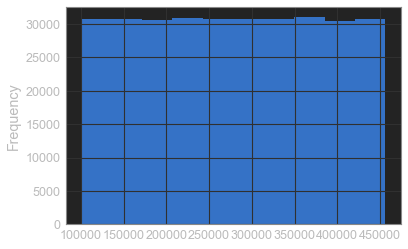


CNT_CHILDREN
count    307511.0
mean          0.0
std           1.0
min           0.0
25%           0.0
50%           0.0
75%           1.0
max          19.0
Name: CNT_CHILDREN, dtype: float64


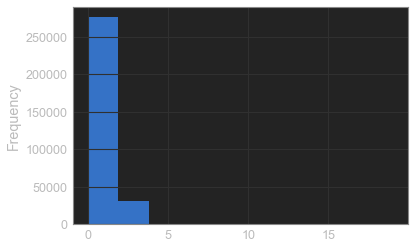


AMT_INCOME_TOTAL
count       307511.0
mean        168798.0
std         237123.0
min          25650.0
25%         112500.0
50%         147150.0
75%         202500.0
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64


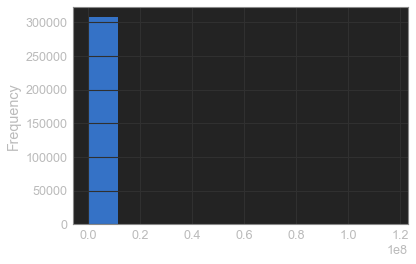


AMT_CREDIT
count     307511.0
mean      599026.0
std       402491.0
min        45000.0
25%       270000.0
50%       513531.0
75%       808650.0
max      4050000.0
Name: AMT_CREDIT, dtype: float64


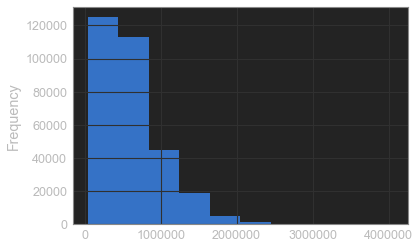


AMT_ANNUITY
count    307499.0
mean      27109.0
std       14494.0
min        1616.0
25%       16524.0
50%       24903.0
75%       34596.0
max      258026.0
Name: AMT_ANNUITY, dtype: float64


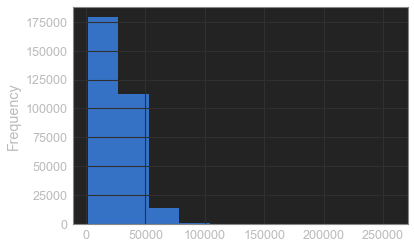


AMT_GOODS_PRICE
count     307233.0
mean      538396.0
std       369446.0
min        40500.0
25%       238500.0
50%       450000.0
75%       679500.0
max      4050000.0
Name: AMT_GOODS_PRICE, dtype: float64


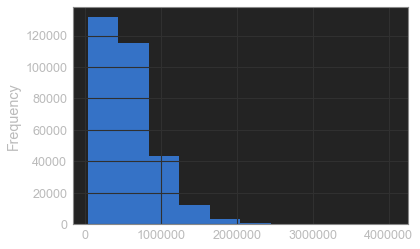


REGION_POPULATION_RELATIVE
count    307511.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: REGION_POPULATION_RELATIVE, dtype: float64


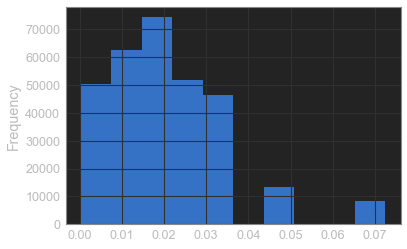


DAYS_BIRTH
count    307511.0
mean     -16037.0
std        4364.0
min      -25229.0
25%      -19682.0
50%      -15750.0
75%      -12413.0
max       -7489.0
Name: DAYS_BIRTH, dtype: float64


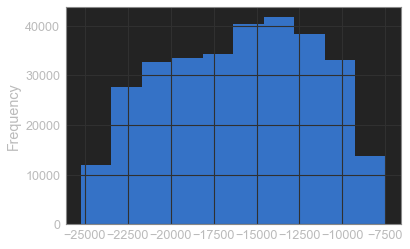


DAYS_EMPLOYED
count    307511.0
mean      63815.0
std      141276.0
min      -17912.0
25%       -2760.0
50%       -1213.0
75%        -289.0
max      365243.0
Name: DAYS_EMPLOYED, dtype: float64


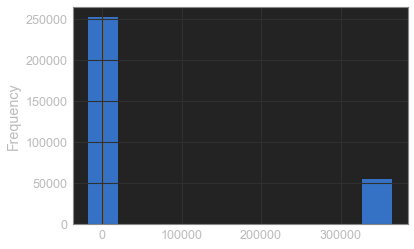


DAYS_REGISTRATION
count    307511.0
mean      -4986.0
std        3523.0
min      -24672.0
25%       -7480.0
50%       -4504.0
75%       -2010.0
max           0.0
Name: DAYS_REGISTRATION, dtype: float64


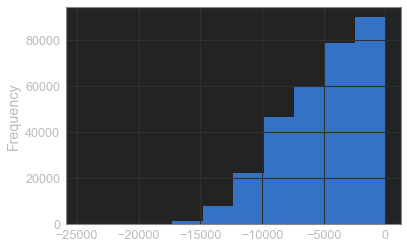


DAYS_ID_PUBLISH
count    307511.0
mean      -2994.0
std        1509.0
min       -7197.0
25%       -4299.0
50%       -3254.0
75%       -1720.0
max           0.0
Name: DAYS_ID_PUBLISH, dtype: float64


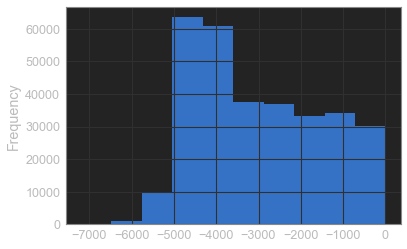


OWN_CAR_AGE
count    104582.0
mean         12.0
std          12.0
min           0.0
25%           5.0
50%           9.0
75%          15.0
max          91.0
Name: OWN_CAR_AGE, dtype: float64


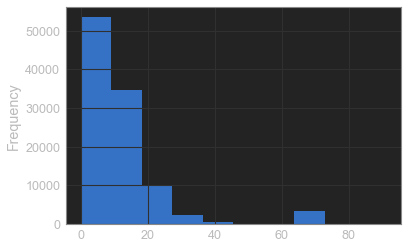


CNT_FAM_MEMBERS
count    307509.0
mean          2.0
std           1.0
min           1.0
25%           2.0
50%           2.0
75%           3.0
max          20.0
Name: CNT_FAM_MEMBERS, dtype: float64


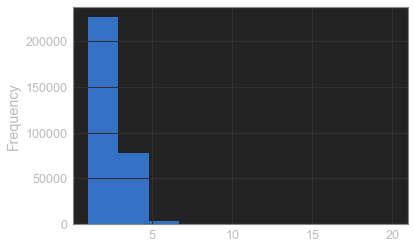


REGION_RATING_CLIENT
count    307511.0
mean          2.0
std           1.0
min           1.0
25%           2.0
50%           2.0
75%           2.0
max           3.0
Name: REGION_RATING_CLIENT, dtype: float64


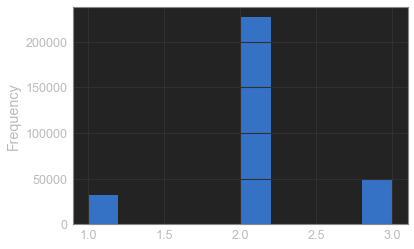


REGION_RATING_CLIENT_W_CITY
count    307511.0
mean          2.0
std           1.0
min           1.0
25%           2.0
50%           2.0
75%           2.0
max           3.0
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


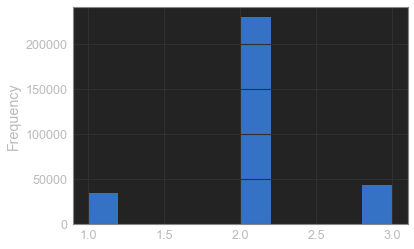


HOUR_APPR_PROCESS_START
count    307511.0
mean         12.0
std           3.0
min           0.0
25%          10.0
50%          12.0
75%          14.0
max          23.0
Name: HOUR_APPR_PROCESS_START, dtype: float64


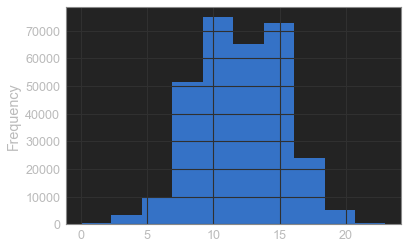


EXT_SOURCE_1
count    134133.0
mean          1.0
std           0.0
min           0.0
25%           0.0
50%           1.0
75%           1.0
max           1.0
Name: EXT_SOURCE_1, dtype: float64


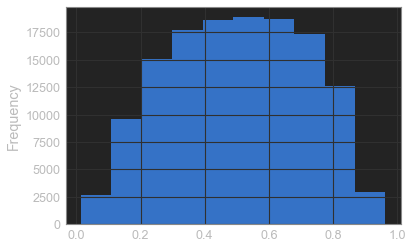


EXT_SOURCE_2
count    306851.0
mean          1.0
std           0.0
min           0.0
25%           0.0
50%           1.0
75%           1.0
max           1.0
Name: EXT_SOURCE_2, dtype: float64


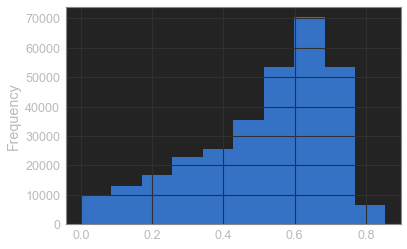


EXT_SOURCE_3
count    246546.0
mean          1.0
std           0.0
min           0.0
25%           0.0
50%           1.0
75%           1.0
max           1.0
Name: EXT_SOURCE_3, dtype: float64


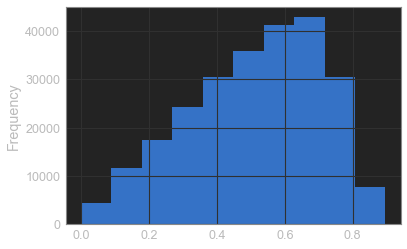


APARTMENTS_AVG
count    151450.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: APARTMENTS_AVG, dtype: float64


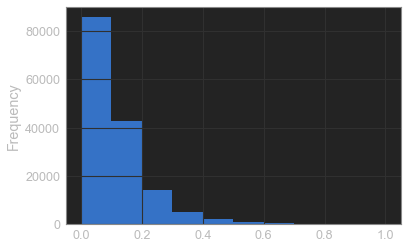


BASEMENTAREA_AVG
count    127568.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: BASEMENTAREA_AVG, dtype: float64


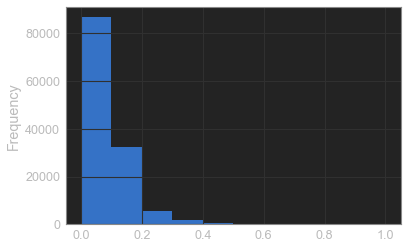


YEARS_BEGINEXPLUATATION_AVG
count    157504.0
mean          1.0
std           0.0
min           0.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64


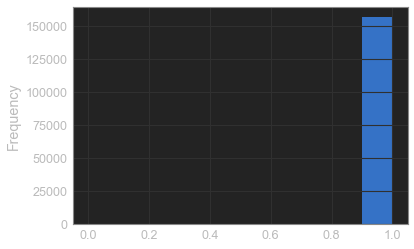


YEARS_BUILD_AVG
count    103023.0
mean          1.0
std           0.0
min           0.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: YEARS_BUILD_AVG, dtype: float64


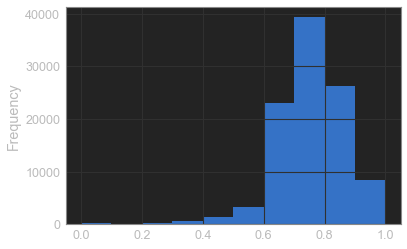


COMMONAREA_AVG
count    92646.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          1.0
Name: COMMONAREA_AVG, dtype: float64


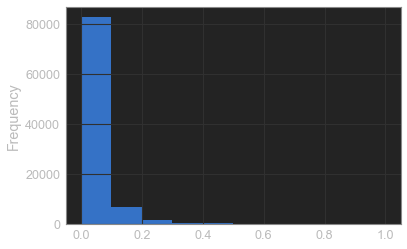


ELEVATORS_AVG
count    143620.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: ELEVATORS_AVG, dtype: float64


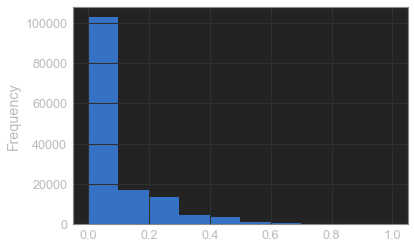


ENTRANCES_AVG
count    152683.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: ENTRANCES_AVG, dtype: float64


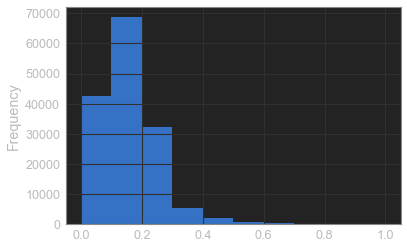


FLOORSMAX_AVG
count    154491.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: FLOORSMAX_AVG, dtype: float64


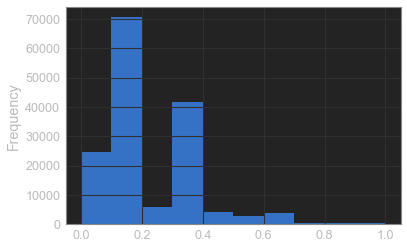


FLOORSMIN_AVG
count    98869.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          1.0
Name: FLOORSMIN_AVG, dtype: float64


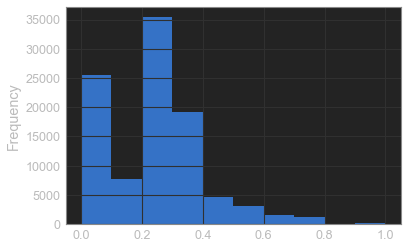


LANDAREA_AVG
count    124921.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: LANDAREA_AVG, dtype: float64


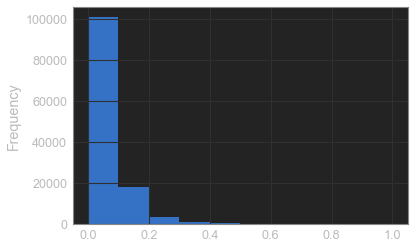


LIVINGAPARTMENTS_AVG
count    97312.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          1.0
Name: LIVINGAPARTMENTS_AVG, dtype: float64


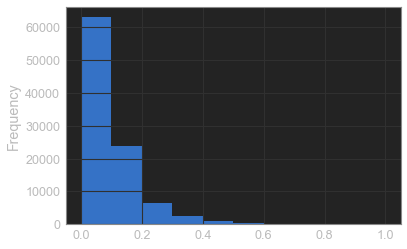


LIVINGAREA_AVG
count    153161.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: LIVINGAREA_AVG, dtype: float64


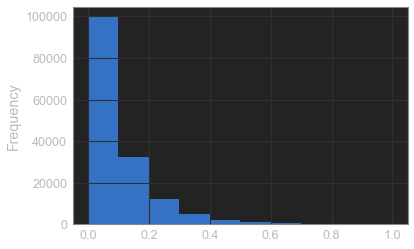


NONLIVINGAPARTMENTS_AVG
count    93997.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          1.0
Name: NONLIVINGAPARTMENTS_AVG, dtype: float64


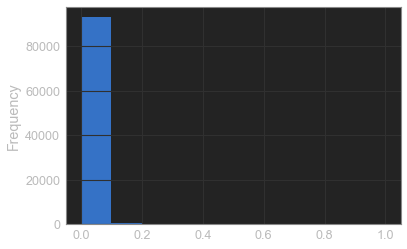


NONLIVINGAREA_AVG
count    137829.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: NONLIVINGAREA_AVG, dtype: float64


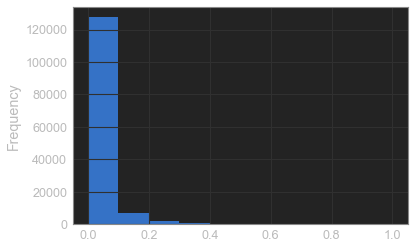


APARTMENTS_MODE
count    151450.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: APARTMENTS_MODE, dtype: float64


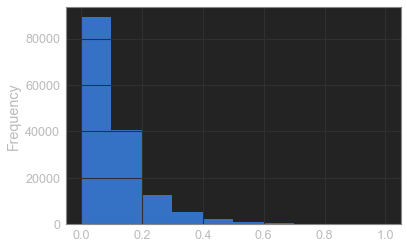


BASEMENTAREA_MODE
count    127568.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: BASEMENTAREA_MODE, dtype: float64


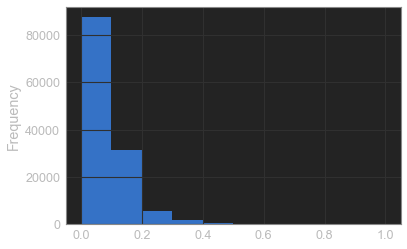


YEARS_BEGINEXPLUATATION_MODE
count    157504.0
mean          1.0
std           0.0
min           0.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64


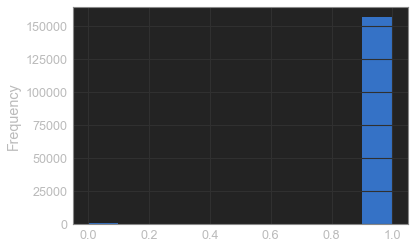


YEARS_BUILD_MODE
count    103023.0
mean          1.0
std           0.0
min           0.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: YEARS_BUILD_MODE, dtype: float64


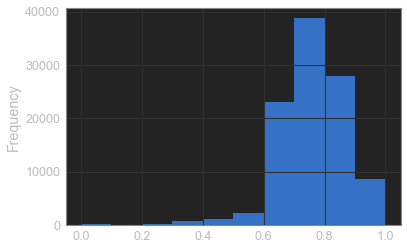


COMMONAREA_MODE
count    92646.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          1.0
Name: COMMONAREA_MODE, dtype: float64


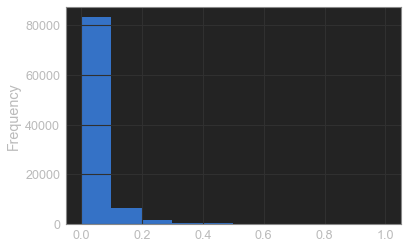


ELEVATORS_MODE
count    143620.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: ELEVATORS_MODE, dtype: float64


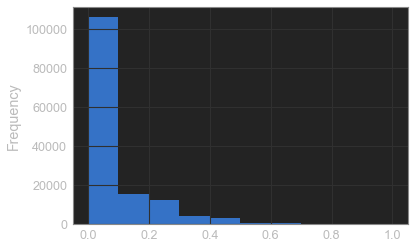


ENTRANCES_MODE
count    152683.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: ENTRANCES_MODE, dtype: float64


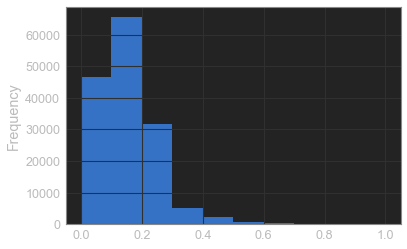


FLOORSMAX_MODE
count    154491.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: FLOORSMAX_MODE, dtype: float64


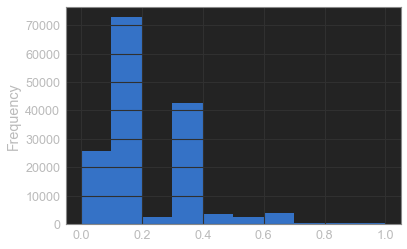


FLOORSMIN_MODE
count    98869.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          1.0
Name: FLOORSMIN_MODE, dtype: float64


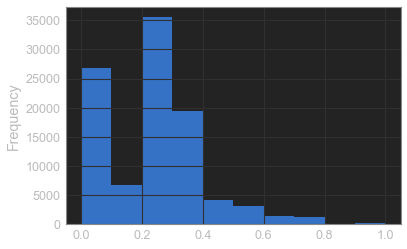


LANDAREA_MODE
count    124921.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: LANDAREA_MODE, dtype: float64


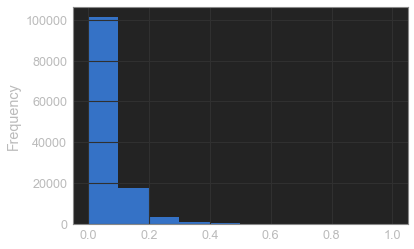


LIVINGAPARTMENTS_MODE
count    97312.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          1.0
Name: LIVINGAPARTMENTS_MODE, dtype: float64


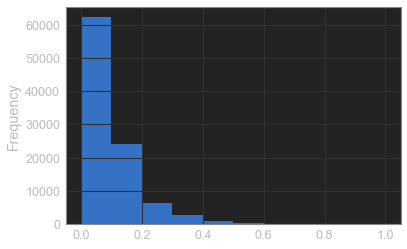


LIVINGAREA_MODE
count    153161.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: LIVINGAREA_MODE, dtype: float64


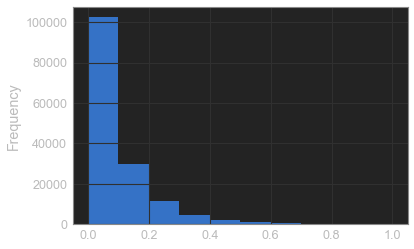


NONLIVINGAPARTMENTS_MODE
count    93997.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          1.0
Name: NONLIVINGAPARTMENTS_MODE, dtype: float64


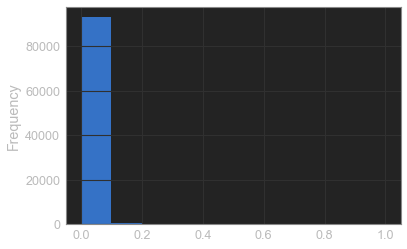


NONLIVINGAREA_MODE
count    137829.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: NONLIVINGAREA_MODE, dtype: float64


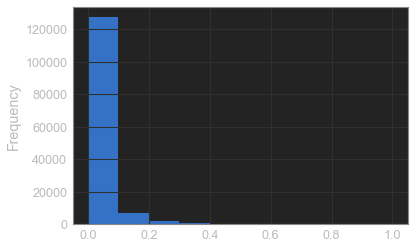


APARTMENTS_MEDI
count    151450.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: APARTMENTS_MEDI, dtype: float64


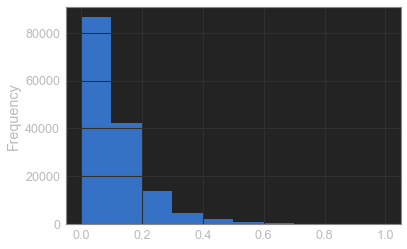


BASEMENTAREA_MEDI
count    127568.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: BASEMENTAREA_MEDI, dtype: float64


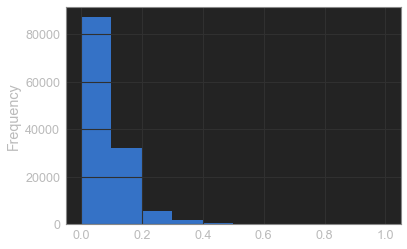


YEARS_BEGINEXPLUATATION_MEDI
count    157504.0
mean          1.0
std           0.0
min           0.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64


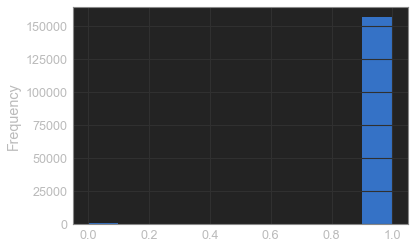


YEARS_BUILD_MEDI
count    103023.0
mean          1.0
std           0.0
min           0.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: YEARS_BUILD_MEDI, dtype: float64


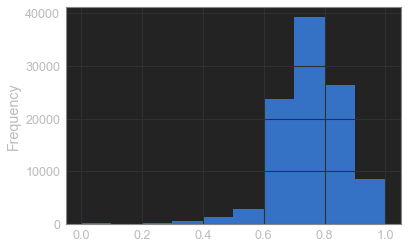


COMMONAREA_MEDI
count    92646.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          1.0
Name: COMMONAREA_MEDI, dtype: float64


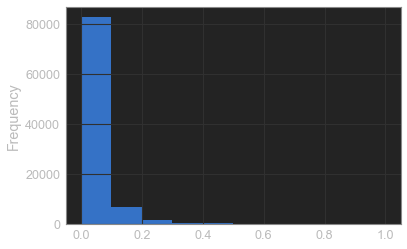


ELEVATORS_MEDI
count    143620.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: ELEVATORS_MEDI, dtype: float64


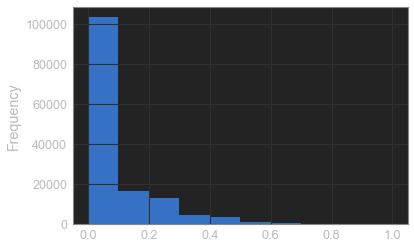


ENTRANCES_MEDI
count    152683.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: ENTRANCES_MEDI, dtype: float64


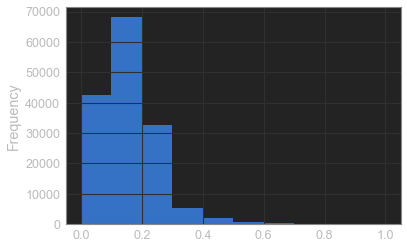


FLOORSMAX_MEDI
count    154491.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: FLOORSMAX_MEDI, dtype: float64


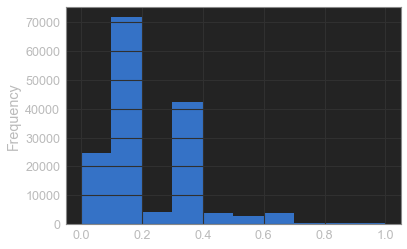


FLOORSMIN_MEDI
count    98869.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          1.0
Name: FLOORSMIN_MEDI, dtype: float64


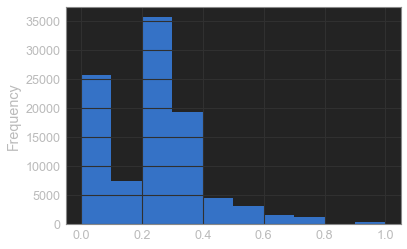


LANDAREA_MEDI
count    124921.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: LANDAREA_MEDI, dtype: float64


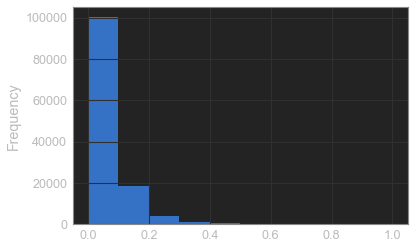


LIVINGAPARTMENTS_MEDI
count    97312.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          1.0
Name: LIVINGAPARTMENTS_MEDI, dtype: float64


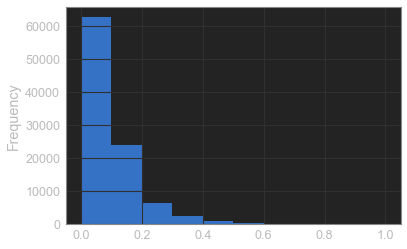


LIVINGAREA_MEDI
count    153161.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: LIVINGAREA_MEDI, dtype: float64


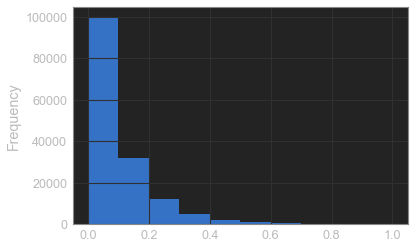


NONLIVINGAPARTMENTS_MEDI
count    93997.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          1.0
Name: NONLIVINGAPARTMENTS_MEDI, dtype: float64


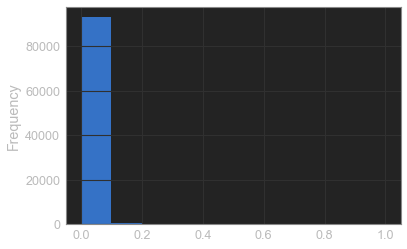


NONLIVINGAREA_MEDI
count    137829.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: NONLIVINGAREA_MEDI, dtype: float64


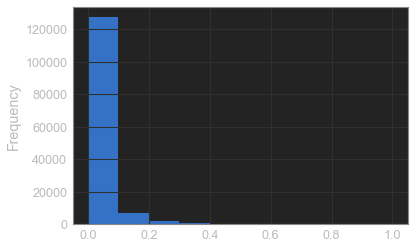


TOTALAREA_MODE
count    159080.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: TOTALAREA_MODE, dtype: float64


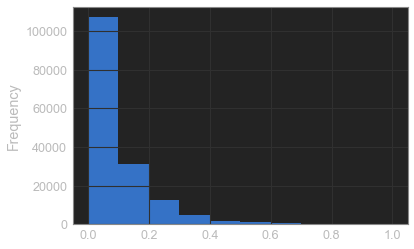


OBS_30_CNT_SOCIAL_CIRCLE
count    306490.0
mean          1.0
std           2.0
min           0.0
25%           0.0
50%           0.0
75%           2.0
max         348.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


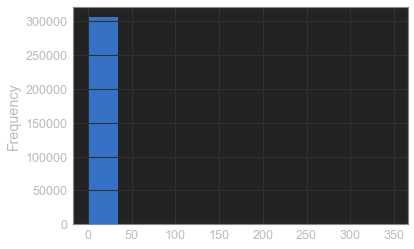


DEF_30_CNT_SOCIAL_CIRCLE
count    306490.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max          34.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


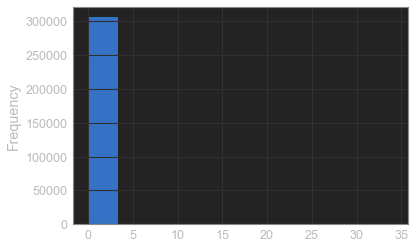


OBS_60_CNT_SOCIAL_CIRCLE
count    306490.0
mean          1.0
std           2.0
min           0.0
25%           0.0
50%           0.0
75%           2.0
max         344.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


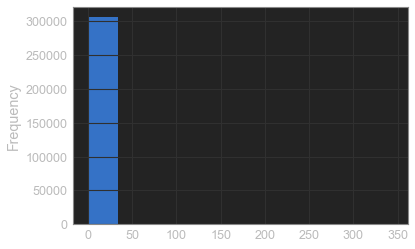


DEF_60_CNT_SOCIAL_CIRCLE
count    306490.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max          24.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


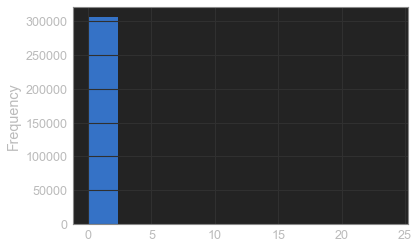


DAYS_LAST_PHONE_CHANGE
count    307510.0
mean       -963.0
std         827.0
min       -4292.0
25%       -1570.0
50%        -757.0
75%        -274.0
max           0.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


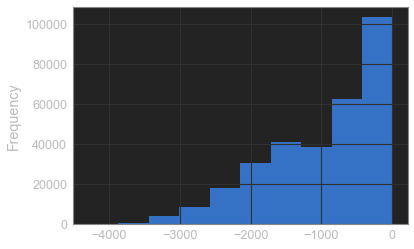


AMT_REQ_CREDIT_BUREAU_HOUR
count    265992.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           4.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


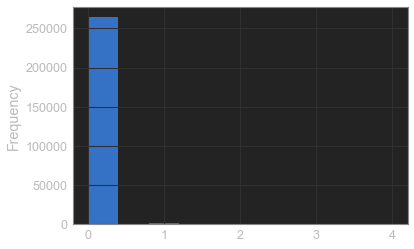


AMT_REQ_CREDIT_BUREAU_DAY
count    265992.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           9.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


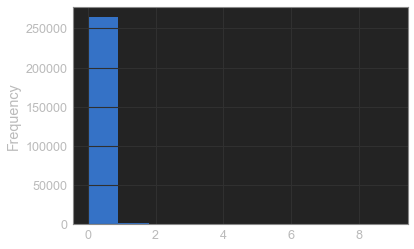


AMT_REQ_CREDIT_BUREAU_WEEK
count    265992.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           8.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


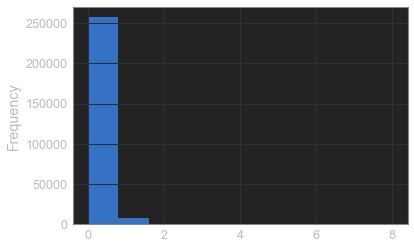


AMT_REQ_CREDIT_BUREAU_MON
count    265992.0
mean          0.0
std           1.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max          27.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


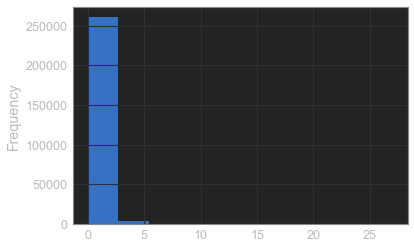


AMT_REQ_CREDIT_BUREAU_QRT
count    265992.0
mean          0.0
std           1.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max         261.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


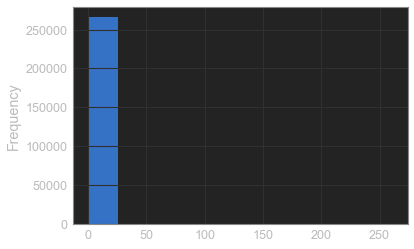


AMT_REQ_CREDIT_BUREAU_YEAR
count    265992.0
mean          2.0
std           2.0
min           0.0
25%           0.0
50%           1.0
75%           3.0
max          25.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


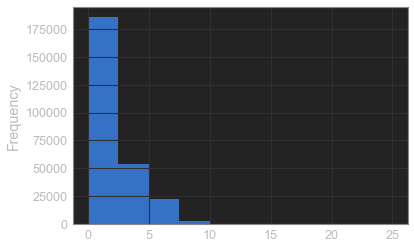

In [45]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
dtype_select = ['int64', 'float64']

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())) != 2)])
numeric_columns

print("Numbers of remain columns : " , len(numeric_columns))

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    """
    Your CODE HERE, make the box plot
    """
    print(f"\n{col}")
    print(app_train[col].describe().round())
    app_train[col].plot.hist()
    plt.show()

<p>1. AMT_INCOME_TOTAL:</p>
<p>因為最大值太大，導致無法看出其真正的分布，全部的資料都集中在0-0.1之間</p>
<p> </p>
<p>2. REGION_POPULATION_RELATIVE:</p>
<p>大部分的資料都小於0.04，只有少數的資料大於0.04</p>
<p> </p>
<p>3. DAYS_EMPLOYED:</p>
<p>最大值明顯高出平均值很多</p>

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

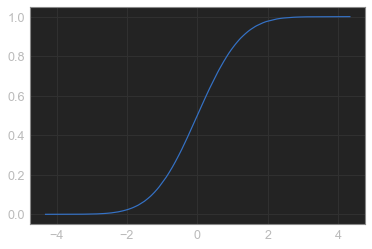

In [98]:
from statsmodels.distributions.empirical_distribution import ECDF
nm = np.random.randn(307511)
nm.sort()
ecdf = ECDF(nm)
plt.plot(ecdf.x, ecdf.y)

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


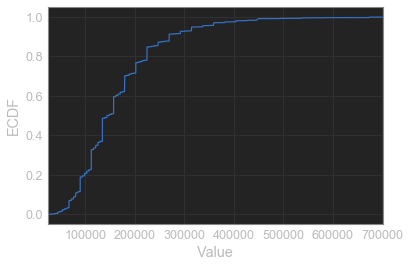

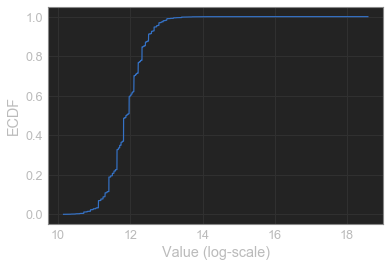

In [97]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""
cdf = app_train['AMT_INCOME_TOTAL'].value_counts().sort_index().cumsum()

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 0.006]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


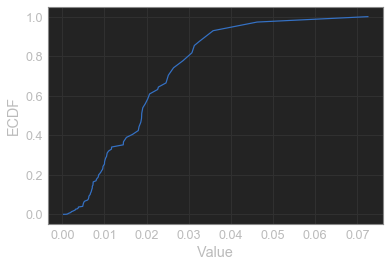

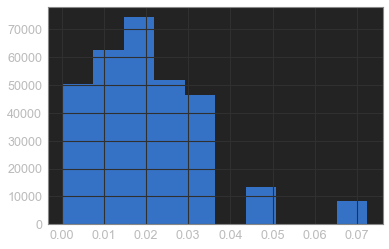

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
            ...  
0.001417      467
0.001333      235
0.000533       39
0.000938       28
0.000290        2
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: int64

In [99]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = app_train['REGION_POPULATION_RELATIVE'].value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


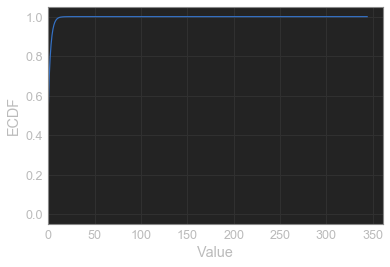

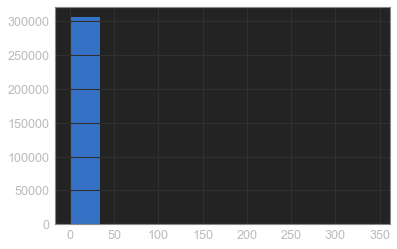

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [111]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
cdf = app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index().cumsum()
plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

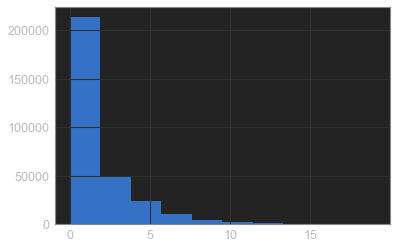

In [120]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = list(app_train.index[(app_train['OBS_60_CNT_SOCIAL_CIRCLE'] <20)])
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'

app_train.loc[loc_a, loc_b].hist()
plt.show()